In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import json
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.models import Model
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pickle

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ari
[nltk_data]     Widyatama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [191]:
#inialization Steamer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [192]:
#Import Dataset
with open('./datasets/greeting.json') as file:
    dataGreet = json.load(file)

with open('./datasets/asamLambung.json') as file:
    dataMed = json.load(file)

In [193]:
#separating tags, patterns, and responses from json into lists and dictonary
patterns = []
tags = []
responses = {}

for intent in dataMed['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tags'])
    responses[intent['tags']] = intent['responses']

for intent in dataGreet['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

print(len(patterns))
print(len(responses))
print(len(tags))
print(patterns[0:9])
print(tags[0:9])
print(responses)

405
67
405
['Saya merasa mual jika sedang stress', 'Saya sering merasa mual setelah makan', 'Apa yang bisa membantu menghilangkan mual?', 'Apa saran untuk meredakan mual akibat asam lambung?', 'Bagaimana cara mengatasi rasa mual ini?', 'Saya merasa mual dan tidak nyaman', 'Kenapa saya sering merasa mual setelah makan pedas?', 'Mual saya tidak kunjung reda, apa yang bisa dilakukan?', 'Makanan apa saja yang bisa memperburuk asam lambung?']
['mual', 'mual', 'mual', 'mual', 'mual', 'mual', 'mual', 'mual', 'makanan_pemicu']
{'mual': ['1. Minum Air Putih yang Cukup\nMual dapat diredakan dengan minum air putih. Hal ini karena dehidrasi atau kekurangan cairan bisa memperburuk kondisi mual. Namun, minum air putih sebaiknya dalam jumlah sedikit tetapi sering untuk menghindari perut terasa penuh yang justru bisa memperparah mual.\n2. Konsumsi makanan yang mudah dicerna\nMenghilangkan mual juga bisa dilakukan dengan mengonsumsi makanan yang mudah dicerna, seperti pisang, nasi, biskuit, dan bubur. 

In [194]:
#steaming patterns for input data
SteamPattterns = []

for pattern in patterns:
    stemming = stemmer.stem(pattern)
    SteamPattterns.append(stemming)

In [195]:
print(len(SteamPattterns))
print(len(responses))
print(len(tags))
print(SteamPattterns[0:9])
print(tags[0:9])

405
67
405
['saya rasa mual jika sedang stress', 'saya sering rasa mual telah makan', 'apa yang bisa bantu hilang mual', 'apa saran untuk reda mual akibat asam lambung', 'bagaimana cara atas rasa mual ini', 'saya rasa mual dan tidak nyaman', 'kenapa saya sering rasa mual telah makan pedas', 'mual saya tidak kunjung reda apa yang bisa laku', 'makan apa saja yang bisa buruk asam lambung']
['mual', 'mual', 'mual', 'mual', 'mual', 'mual', 'mual', 'mual', 'makanan_pemicu']


In [196]:
#stores response data in pickle form
pickle.dump(responses,open('./data/responses.pkl','wb'))

In [199]:
#function to split the dataset into training and validation, by selecting 20% for validation, and the data is stored in the form of a tensor.
def splitDataset(inputs, labels):
    totalData = len(inputs)
    valSize = int(totalData * 0.2)
    valSplit = list(range(0, valSize * 5, 5))
    trainSplit = [i for i in range(totalData) if i not in valSplit]


    trainTexts = [inputs[i] for i in trainSplit]
    valTexts = [inputs[i] for i in valSplit]
    trainLabels = [labels[i] for i in trainSplit]
    valLabels = [labels[i] for i in valSplit]

    trainDataset = tf.data.Dataset.from_tensor_slices((trainTexts, trainLabels))
    valDataset = tf.data.Dataset.from_tensor_slices((valTexts, valLabels))

    return trainDataset, valDataset

In [200]:
#calls the splitDataset function by passing the data frame parameter
trainDataset, valDataset = splitDataset(SteamPattterns, tags)

print(f"Total data Training {trainDataset.cardinality()}\n")
print(f"Total data Validation {valDataset.cardinality()}\n")

print(trainDataset)
print(valDataset)

Total data Training 324

Total data Validation 81

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


In [201]:
#checking the result of data split
for data in trainDataset.take(5).as_numpy_iterator():
    print(data)

print("")

for data in valDataset.take(5).as_numpy_iterator():
    print(data)

(b'saya sering rasa mual telah makan', b'mual')
(b'apa yang bisa bantu hilang mual', b'mual')
(b'apa saran untuk reda mual akibat asam lambung', b'mual')
(b'bagaimana cara atas rasa mual ini', b'mual')
(b'kenapa saya sering rasa mual telah makan pedas', b'mual')

(b'saya rasa mual jika sedang stress', b'mual')
(b'saya rasa mual dan tidak nyaman', b'mual')
(b'apa makan yang harus saya hindar', b'makanan_pemicu')
(b'makan yang picu asam lambung', b'makanan_pemicu')
(b'minum apa saja yang buruk asam lambung', b'minumam_beresiko')


In [202]:
#inialization Stopwords 
stopWords = stopwords.words('indonesian')
print(stopWords)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [203]:
#standardize text to all lowercase letters, cut stopwords and symbols
def standardizeFunc(sentence):
    stopwords = stopWords
    
    sentence = tf.strings.lower(sentence)

    for word in stopwords:
        if word[0] == "'":
            sentence = tf.strings.regex_replace(sentence, rf"{word}\b", "")
        else:
            sentence = tf.strings.regex_replace(sentence, rf"\b{word}\b", "")
    sentence = tf.strings.regex_replace(sentence, r'[!"#$%&()\*\+,-\./:;<=>?@\[\\\]^_`{|}~\']', "")

    return sentence

In [204]:
with open('./data/standardizeFunc.pkl', 'wb') as file:
    pickle.dump(standardizeFunc, file)

In [205]:
#create a vectorizer function for the text that will be input to the model
maxLeght = 30
def fitVectorizer(trainSentences, standardizeFunc):
  vectorizer = tf.keras.layers.TextVectorization(
    standardize=standardizeFunc,
    output_sequence_length=maxLeght
  )

  vectorizer.adapt(trainSentences)
  return vectorizer

In [206]:
#create a vertoriser by providing question data to the train for adapt.
textDataset = trainDataset.map(lambda text, label: text)
vectorizer = fitVectorizer(textDataset, standardizeFunc)
vocabSize = vectorizer.vocabulary_size()

print(f"Vocabulary contains {vocabSize} words\n")

Vocabulary contains 204 words



In [207]:
#view vocabulary results from the vectorizer
vocabulary = vectorizer.get_vocabulary()
print("Vocabulary:", vocabulary)
print("Vocabulary size:", len(vocabulary))


Vocabulary: ['', '[UNK]', 'asam', 'lambung', 'makan', 'derita', 'pengaruh', 'buruk', 'minum', 'sakit', 'risiko', 'laku', 'akibat', 'gejala', 'stres', 'air', 'tingkat', 'obat', 'bantu', 'picu', 'hubung', 'bahaya', 'orang', 'kena', 'hidup', 'diet', 'tular', 'pahit', 'mulut', 'hadap', 'genetik', 'aman', 'alami', 'sehat', 'reda', 'parah', 'kanker', 'kambuh', 'dampak', 'turun', 'tanda', 'sesak', 'napas', 'mual', 'kopi', 'hindar', 'gerd', 'dada', 'cegah', 'alkohol', 'ulu', 'tidur', 'soda', 'serius', 'sembuh', 'rokok', 'perut', 'pedas', 'panas', 'lemak', 'kondisi', 'kembung', 'hati', 'vegetarian', 'tua', 'sendawa', 'putih', 'olahraga', 'nasi', 'konsumsi', 'komplikasi', 'kerongkongan', 'kentang', 'kelapa', 'hilang', 'goreng', 'faktor', 'es', 'efek', 'dingin', 'buah', 'baring', 'badan', 'tubuh', 'tenggorok', 'tel', 'sulit', 'saran', 'refluks', 'pola', 'perih', 'nyeri', 'madu', 'maag', 'kelola', 'gaya', 'cokelat', 'cerna', 'berat', 'beda', 'aktivitas', 'wanita', 'usia', 'umur', 'tips', 'solusi',

In [208]:
#retrieves the text data used for the vectorizer, and saves it in the form of a pickle.
textData = []

for text, label in trainDataset:
    textData.append(text.numpy())

with open('./data/dataset.pkl', 'wb') as file:
    pickle.dump((textData), file)

In [209]:
#create a function to convert the label to encode
def fitLabelEncoder(trainLabel, valLabel):
    trainLabel = list(trainLabel.as_numpy_iterator())
    valLabel = list(valLabel.as_numpy_iterator())
    labels = trainLabel + valLabel

    labelEncoder = tf.keras.layers.StringLookup(num_oov_indices=0)
    labelEncoder.adapt(labels)

    return labelEncoder

In [210]:
#retrieves labels from training and validation data to be adapted to the labelEncoder function.
trainLabels = trainDataset.map(lambda text, label: label)
valLabels = valDataset.map(lambda text, label: label)

labelEncoder = fitLabelEncoder(trainLabels,valLabels)
uniqLabel = len(labelEncoder.get_vocabulary())

print(f'Unique labels: {labelEncoder.get_vocabulary()}')
print(f'Num of unique labels: {uniqLabel}')

Unique labels: ['pahit_di_mulut', 'menular', 'mengelola_stres', 'genetik', 'air_dingin', 'soda', 'mengobati', 'makanan_pemicu', 'faktor_umur', 'bahaya', 'tidur_dan_berbaring_setelah_makan', 'sesak_napas', 'pengaruh_asam_lambung_pada_kehidupan', 'mual', 'minumam_beresiko', 'kopi', 'kematian', 'gejala', 'alkohol', 'rekomendasi_buah', 'perut_kembung', 'penyakit_turunan', 'panas_di_dada', 'olahraga', 'merokok', 'kanker', 'waktu_makan_terbaik', 'thanks', 'sembuh', 'pola_hidup_pengaruh_asam_lambung', 'penyebab', 'pedas', 'makanan_penunjang', 'makan tidak teratur', 'definisi', 'berat_badan', 'bahaya_dari_diet', 'nasi_putih', 'menghindari', 'kentang_goreng', 'kambuh', 'diagnosa', 'cemilan_sehat', 'bersendawa', 'asam', 'tinggi_badan', 'tanda_parah', 'sulit_menelan', 'stress', 'sakit_tenggorokan', 'pychan', 'mengatasi_rasa_perih_di_ulu_hati', 'makanan_berminyak', 'madu_meredakan', 'maag', 'konsumsi_obat', 'kondisi_kritis', 'jenis_kelamin', 'hidup_sehat_untuk_penderita', 'greeting', 'diet_vegetar

In [211]:
#saves the vocabulary label result into a pickle
vocab = labelEncoder.get_vocabulary()
with open('./data/labelVocab.pkl', 'wb') as file:
    pickle.dump(vocab, file)

In [212]:
#mapping the functions of the vectorizer for text, and the encoder for labels, and making a batch of
def preprocessDataset(dataset, textVectorizer, labelEncoder):
    dataset = dataset.map(lambda text, label: (textVectorizer(text), labelEncoder(label)))
    dataset = dataset.batch(8)

    return dataset

In [213]:
#apply preprocessing functions to training and validation data
trainProcDataset = preprocessDataset(trainDataset, vectorizer, labelEncoder)
valProcDataset = preprocessDataset(valDataset, vectorizer, labelEncoder)

print(f"Total train Batch: {trainProcDataset.cardinality()}")
print(f"Total validation Batch: {valProcDataset.cardinality()}")

trainBatch = next(trainProcDataset.as_numpy_iterator())
valBatch = next(valProcDataset.as_numpy_iterator())

print(f"Shape train batch: {trainBatch[0].shape}")
print(f"Shape validation batch: {valBatch[0].shape}")

Total train Batch: 41
Total validation Batch: 11
Shape train batch: (8, 30)
Shape validation batch: (8, 30)


In [214]:
#view results of preprocessing
for text, label in trainProcDataset.take(5):
    print("Sample text:", text.numpy())
    print("Sample label:", label.numpy())

print("")

for text, label in valProcDataset.take(5):
    print("Sample text:", text.numpy())
    print("Sample label:", label.numpy())

Sample text: [[ 43   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 18  74  43   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 87  34  43  12   2   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 43   4  57   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 43 166  34  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   7   2   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  4  19   2   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

In [215]:
#designing the model structure
def createModel():
    inputLayer = tf.keras.Input(shape=(None,))

    embedLayer = tf.keras.layers.Embedding(input_dim=vectorizer.vocabulary_size(), output_dim=64)(inputLayer)
    bilLSTM1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False))(embedLayer)
    dense1 = tf.keras.layers.Dense(32, activation='relu')(bilLSTM1)
    dropout1 = tf.keras.layers.Dropout(0.5)(dense1)
    outputLayer = tf.keras.layers.Dense(len(labelEncoder.get_vocabulary()), activation='softmax')(dropout1)
    
    model = Model(inputs=inputLayer, outputs=outputLayer)

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

In [216]:
#create and display models
modelPhychan = createModel()
modelPhychan.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_9 (Embedding)         │ (None, None, 64)       │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 66)             │         2,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,146 (164.63 KB)

 Trainable params: 42,146 (164.63 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
#make a Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        if train_acc >= 0.75 and val_acc >= 0.7:
            self.model.stop_training = True

In [218]:
#train the model
ShuTrainProcDataset = trainProcDataset.shuffle(buffer_size=4, seed=42)
history = modelPhychan.fit(ShuTrainProcDataset, epochs=100, validation_data=valProcDataset, callbacks=myCallback())

Epoch 1/100


41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.0200 - loss: 4.1945 - val_accuracy: 0.0247 - val_loss: 4.1840
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.0126 - loss: 4.1813 - val_accuracy: 0.0617 - val_loss: 4.1810
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.0547 - loss: 4.1666 - val_accuracy: 0.0247 - val_loss: 4.1755
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.0505 - loss: 4.1577 - val_accuracy: 0.0494 - val_loss: 4.1592
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.0368 - loss: 4.1433 - val_accuracy: 0.0617 - val_loss: 4.1290
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.0871 - loss: 4.0967 - val_accuracy: 0.0617 - val_loss: 4.0537
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.0784 - loss: 3.9951 - val_accuracy: 0.0864 - val_loss: 3.9281
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.0298 - loss: 3.8768 - val_accuracy: 0.0988 - val_

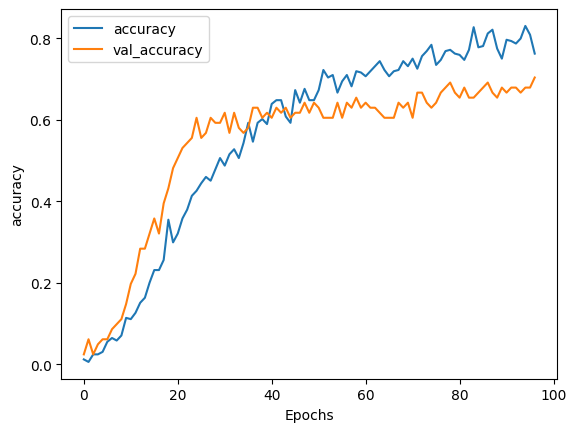

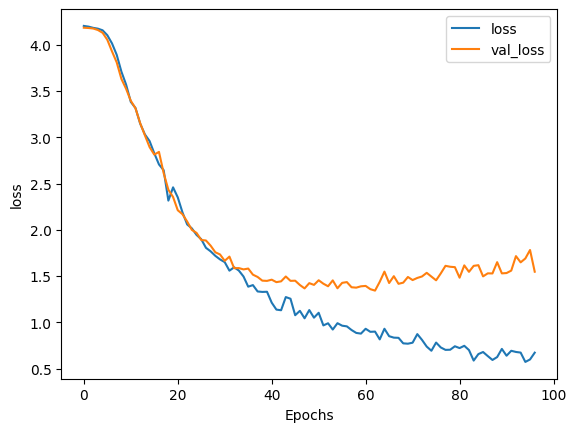

In [219]:
#visualization of accuracy and loss results
def plotGraphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plotGraphs(history, "accuracy")
plotGraphs(history, "loss")

In [252]:
#determine the minimum confidence and provide response results based on tags
def getResponse(predictTag, confidence):
    if confidence < 0.55:
        return "Maaf, input yang Anda masukkan kurang jelas."
    if predictTag == '[UNK]': 
        return "Maaf, saya tidak mengerti kata yang Anda masukkan."
    return np.random.choice(responses[predictTag])

In [253]:
#create functions that accept input for preprocessing, prediction, and return response
def showRespon(input):
    stemming = stemmer.stem(input)
    inputA = vectorizer([stemming])
    prediction = modelPhychan.predict(inputA)

    predictClassIndex = np.argmax(prediction, axis=-1)
    confidence = prediction[0][predictClassIndex[0]]
    predictTag = labelEncoder.get_vocabulary()[predictClassIndex[0]]
    response = getResponse(predictTag, confidence)

    return predictTag, response, confidence

In [268]:
#testing input for prediction result
testInput = "apakah penderita asam lambung boleh diet"
predictTag, response, confidence = showRespon(testInput)

print(f"Predicted tag: {predictTag}")
print(f"Confidence: {confidence:.2f}")
print(f"Response: {response}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted tag: bahaya_dari_diet
Confidence: 0.86
Response: Diet yang tidak tepat bisa memperburuk gejala asam lambung. Namun, dengan memilih makanan yang tepat, diet bisa membantu mengendalikan gejala asam lambung. Beberapa makanan pemicu, seperti makanan tinggi lemak, produk olahan susu tinggi lemak, tomat, buah-buahan sitrus, cokelat, makanan pedas, serta minuman berkafein, sebaiknya dihindari oleh penderita asam lambung.
Sebaliknya, makanan yang baik untuk penderita asam lambung meliputi protein rendah kolesterol seperti ikan salmon dan ayam tanpa lemak, sayuran hijau seperti brokoli dan bayam, buah-buahan yang kaya serat dan vitamin C seperti apel, pisang, dan alpukat, serta karbohidrat sehat seperti kentang dan biji-bijian.


In [ ]:
#Save a model
modelPhychan.save("./model/chatbotModel.h5", history)

In [224]:
#modelPhychan.save("./model/chatbotModel.keras", history)